# 1.	Preliminary analysis:
a.	Perform preliminary data inspection and report the findings on the structure of the data, missing values, duplicates, etc.

b.	Based on these findings, remove duplicates (if any) and treat missing values using an appropriate strategy

# 2.	Prepare a report about the data explaining the distribution of the disease and the related factors using the steps listed below:
a.	Get a preliminary statistical summary of the data and explore the measures of central tendencies and spread of the data

b.	Identify the data variables which are categorical and describe and explore these variables using the appropriate tools, such as count plot 

c.	Study the occurrence of CVD across the Age category

d.	Study the composition of all patients with respect to the Sex category

e.	Describe the relationship between cholesterol levels and a target variable

f.	Use a pair plot to understand the relationship between all the given variables

# 3.	Build a baseline model to predict the risk of a heart attack using a logistic regression. Apply different model assessment methods



## Task 1

In [59]:
import numpy as np
import pandas as pd

In [60]:
health_care = pd.read_excel('data/1645792390_cep1_dataset.xlsx')

In [61]:
health_care.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [62]:
health_care.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [63]:
health_care.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [64]:
health_care.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [65]:
health_care[health_care.duplicated(keep=False)].head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [66]:
health_care.drop_duplicates(inplace=True)
health_care.duplicated().any()

False

## Task 2

In [67]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import seaborn as sns

C:\Users\sanaa\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


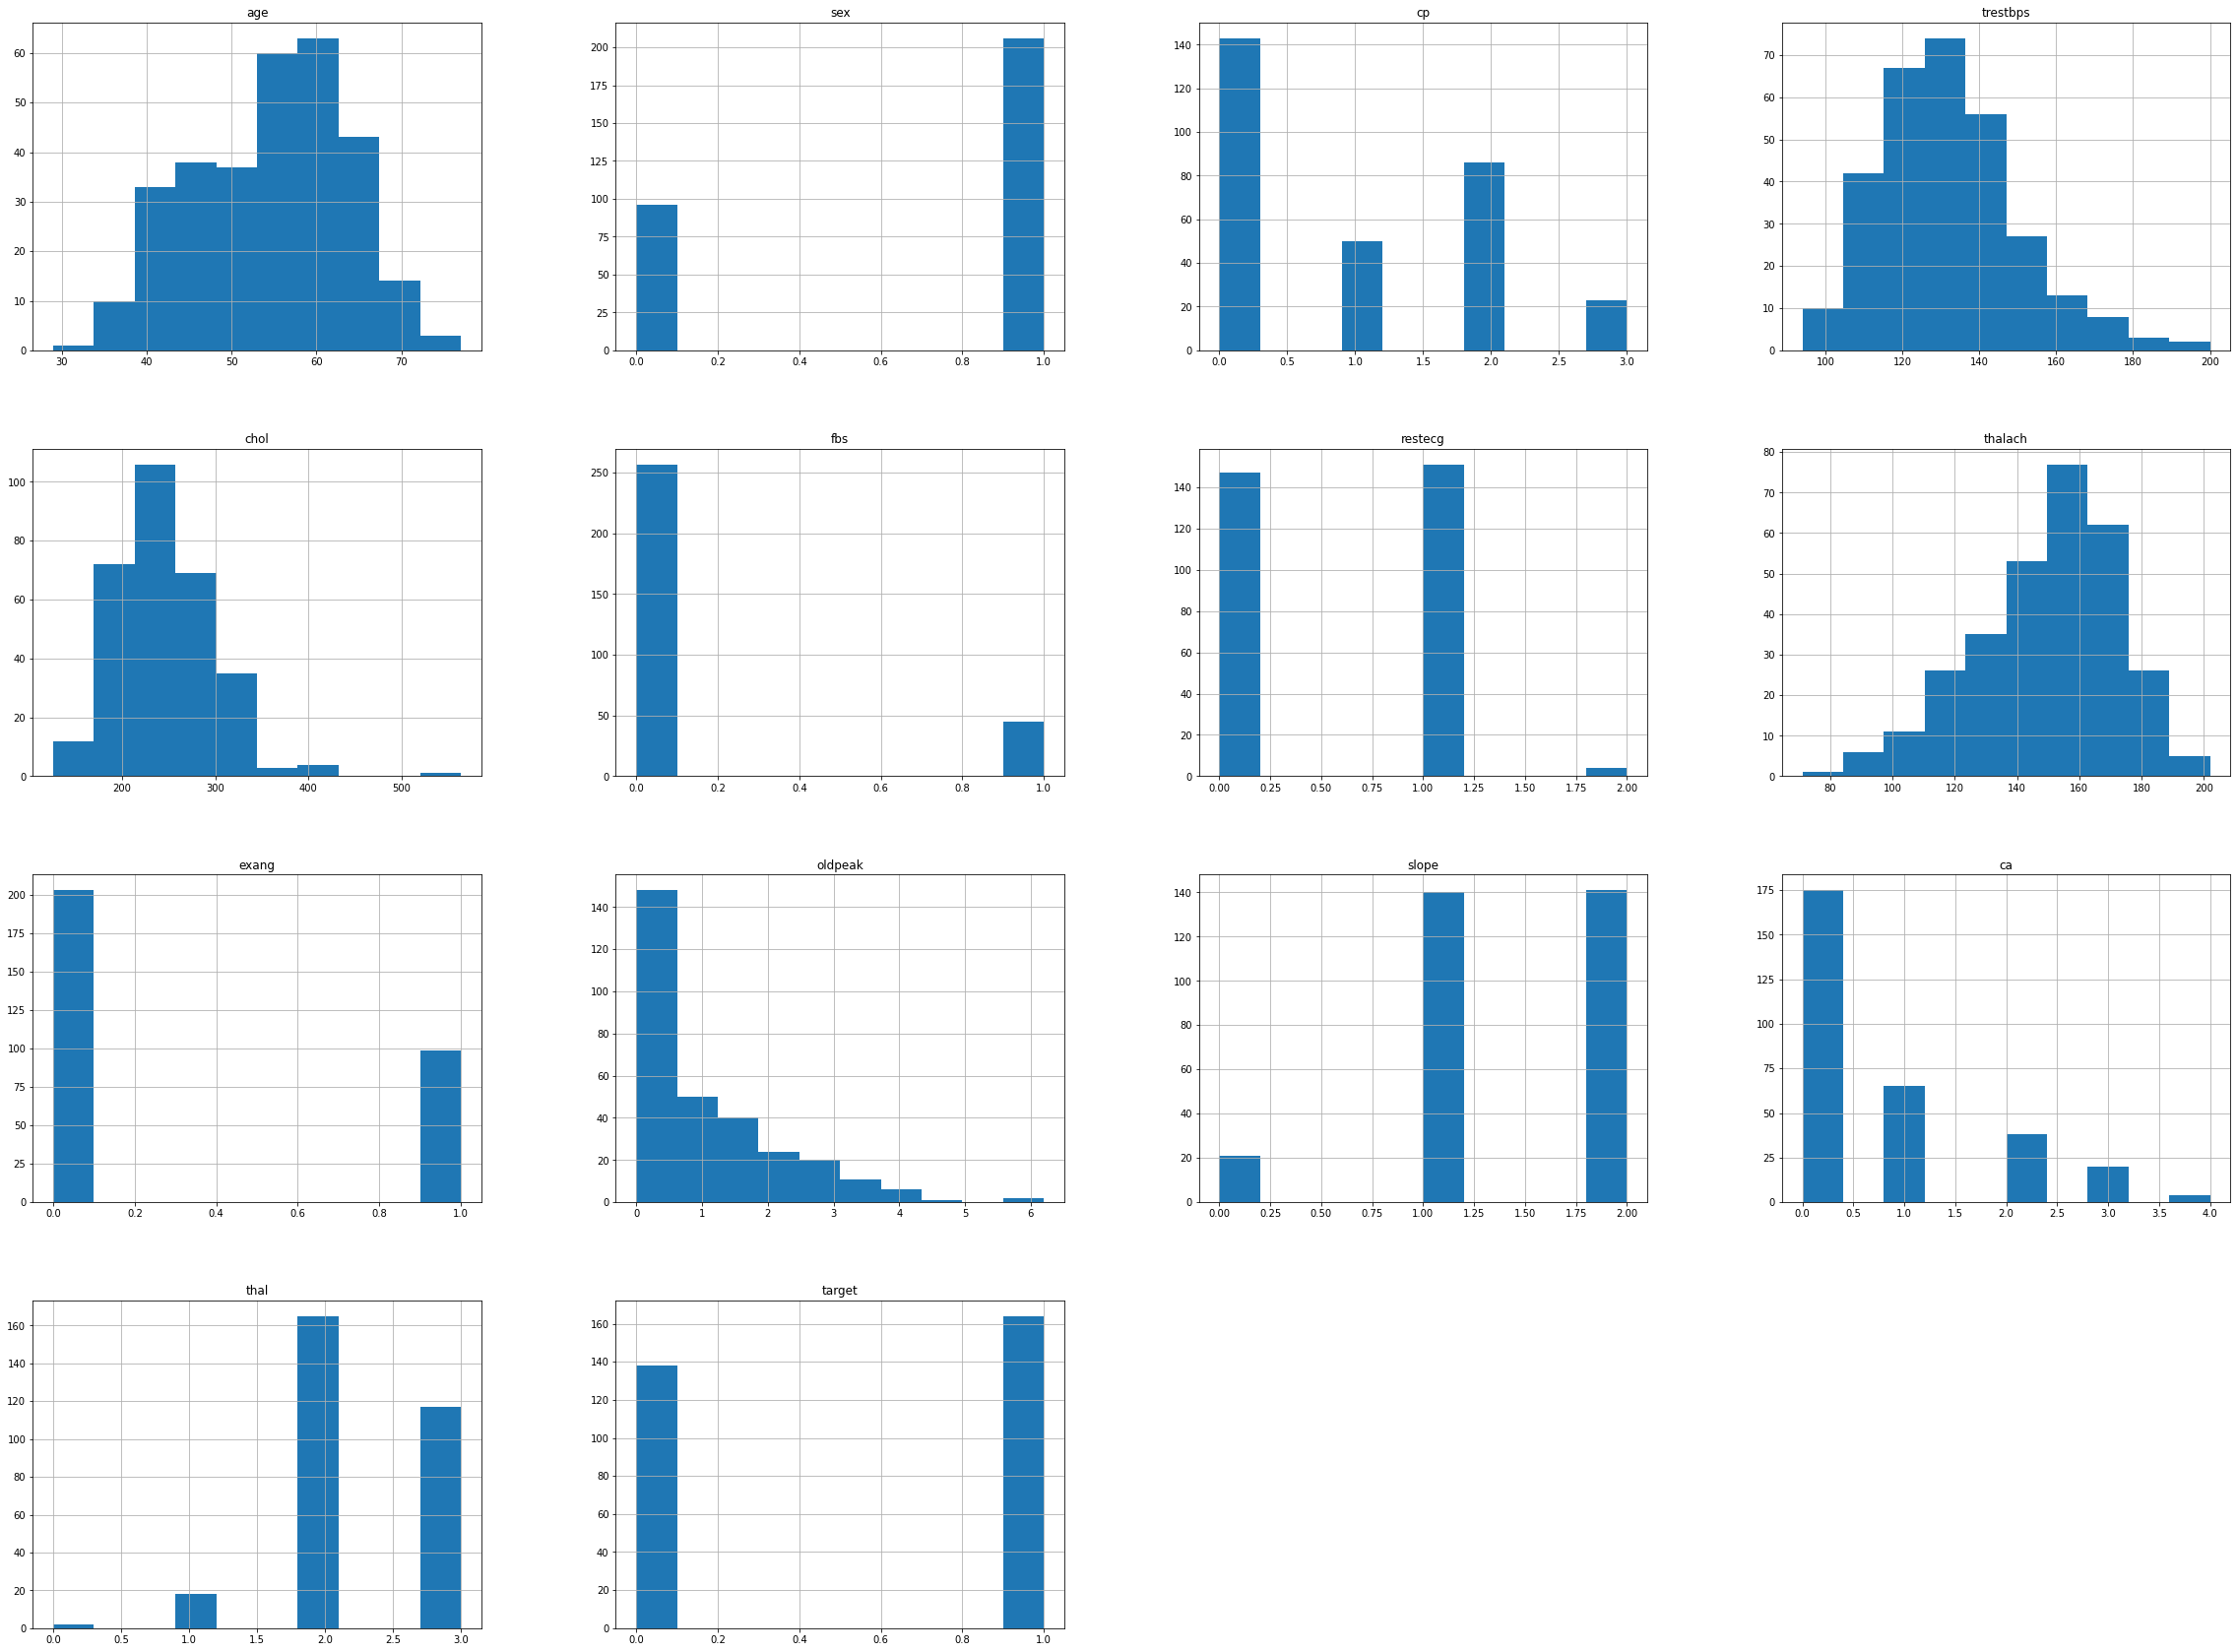

In [68]:
#a. Get a preliminary statistical summary of the data and explore the measures of central tendencies and spread of the data
fig = plt.figure(figsize = (40,30))
health_care.hist(ax = fig.gca());

Text(0.5, 0.98, 'The Occurance of CVD Accross The Age Category')

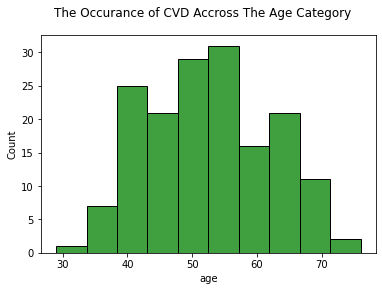

In [69]:
#c.	Study the occurrence of CVD across the Age category
sns.histplot(health_care[health_care['target'] == 1]
             ['age'], color='green')
plt.suptitle('The Occurance of CVD Accross The Age Category')

([<matplotlib.axis.XTick at 0x1c2204ca408>,
 [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

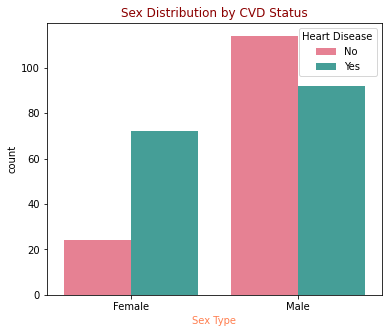

In [70]:
#Study the composition of all patients with respect to the Sex category
plt.figure(figsize=(6, 5))
sns.countplot(data=health_care, x='sex', hue='target', palette="husl")
plt.title('Sex Distribution by CVD Status', color='darkred')
plt.xlabel('Sex Type', color='coral')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.xticks([0,1],['Female','Male'])


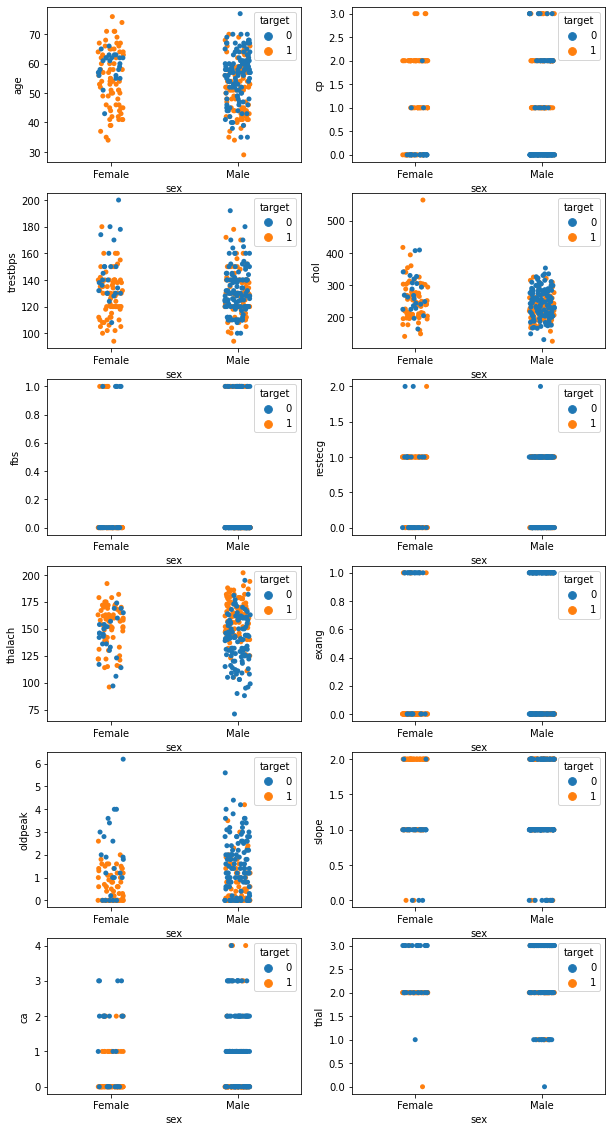

In [71]:
#Study the composition of all patients with respect to the Sex category

features = health_care[['age', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']]
fig , ax = plt.subplots(6,2,figsize = (10,20))     # set up 2 x 2 frame count plot with figsize 10 x 10
for i , subplots in zip (features, ax.flatten()):  
    sns.stripplot(x='sex',y=features[i],hue='target',data=health_care,ax = subplots)
   
    
plt.setp(ax, xticks=[0,1], xticklabels=['Female', 'Male'])

plt.show()

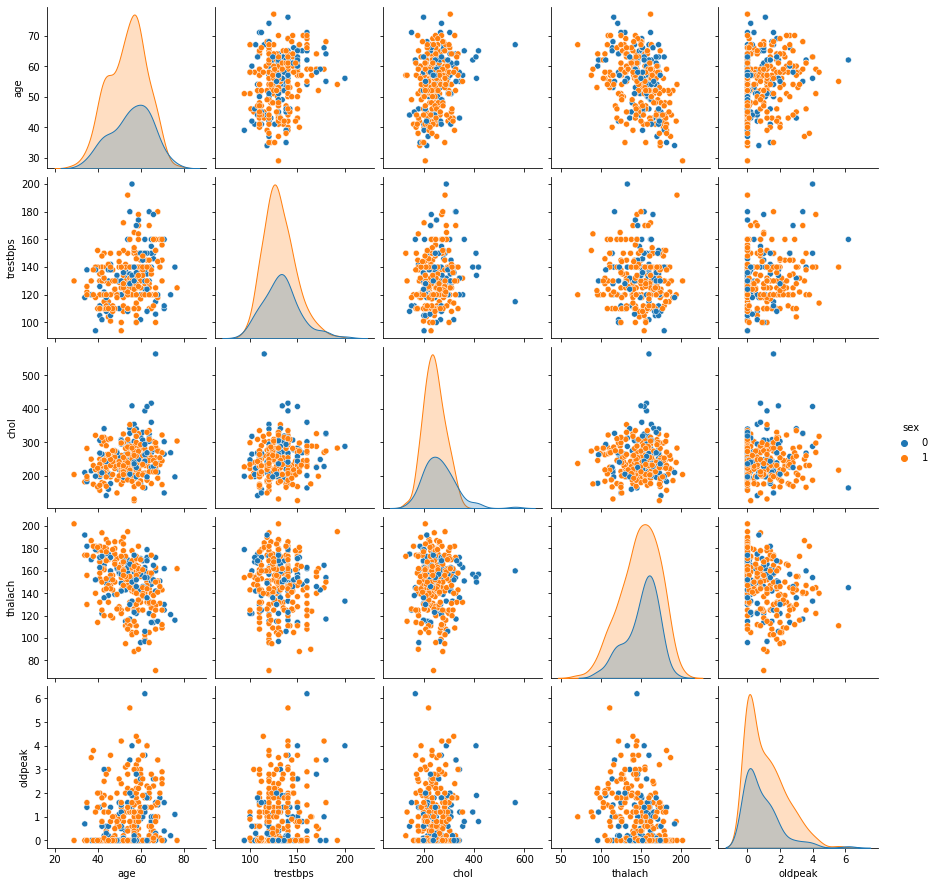

In [72]:
#pairplot for continous features
sns.pairplot(health_care[['age', 'trestbps', 'chol','thalach', 'oldpeak', 'sex']], hue='sex')

## Task 3

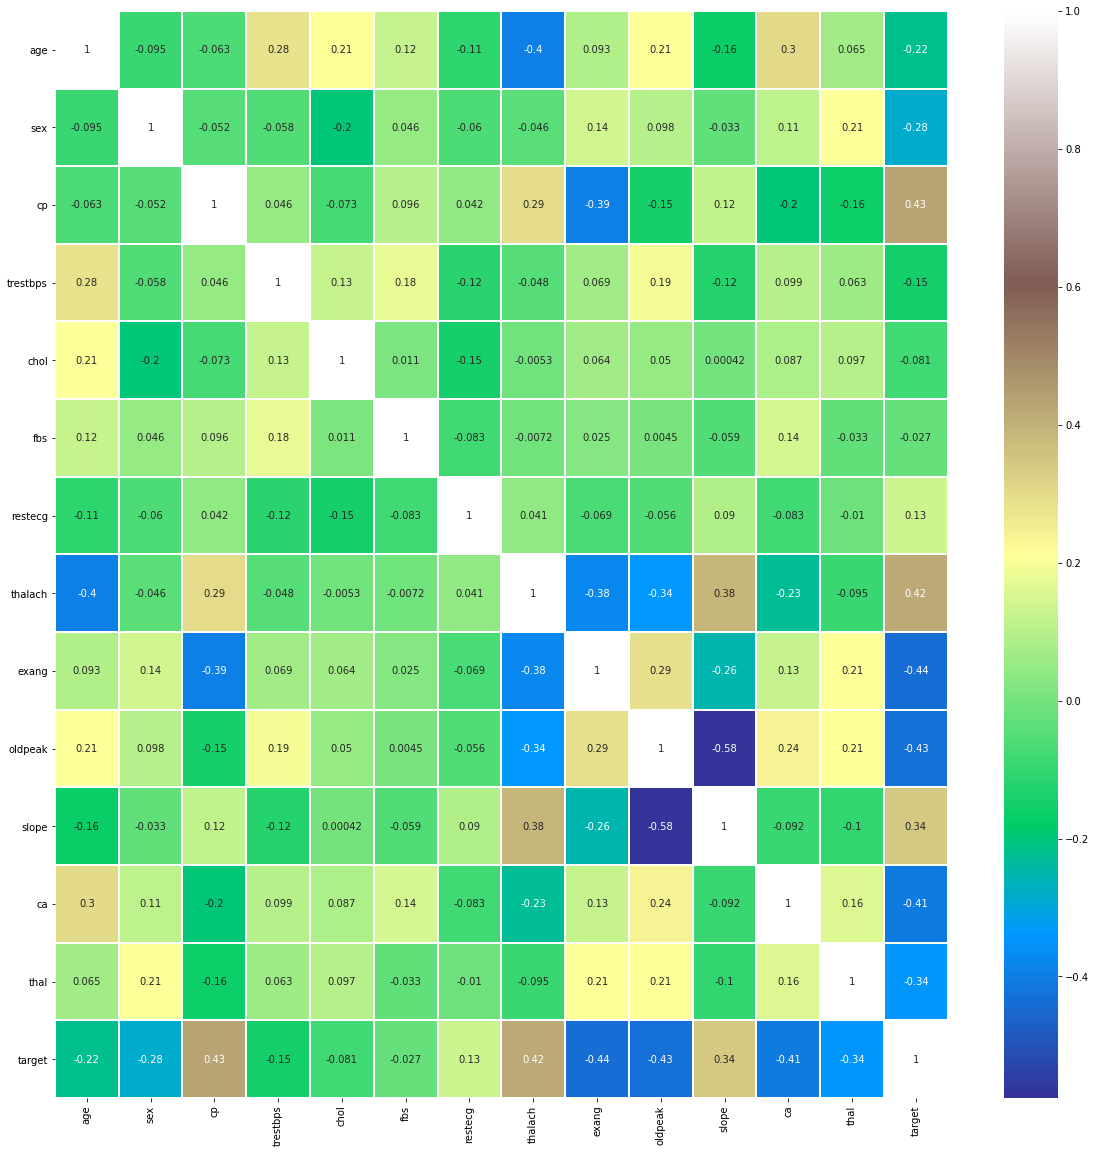

In [73]:
# Creating a correlation heatmap
sns.heatmap(health_care.corr(),annot=True, cmap='terrain', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(20,20)
plt.show()

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [75]:
y =health_care.pop('target')
X=health_care

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify=y)

In [76]:
X_train.shape, X_test.shape

((211, 13), (91, 13))

In [77]:
from sklearn.linear_model import LogisticRegression
lr1 = LogisticRegression(max_iter=800)

In [78]:
lr1.fit(X_train,y_train)

LogisticRegression(max_iter=800)

In [79]:
cvd_preds = lr1.predict(X_test)

Accuracy score 0.8571428571428571
Recall score 0.8979591836734694
Precision score 0.8461538461538461
f1 score 0.8712871287128713


<AxesSubplot:>

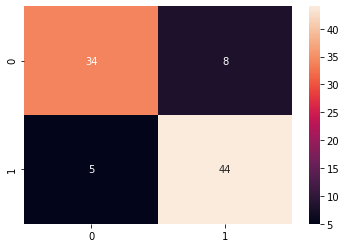

In [80]:
print('Accuracy score',accuracy_score(y_test, cvd_preds))
print('Recall score',recall_score(y_test, cvd_preds))
print('Precision score',precision_score(y_test, cvd_preds))
print('f1 score',f1_score(y_test, cvd_preds))
cm = confusion_matrix(y_test,cvd_preds)
sns.heatmap(cm,annot=True)

In [81]:
import matplotlib.pyplot as plt
from sklearn.metrics import auc, roc_curve
def plot_roc(y_test, preds, ax = None):
    """
    Plot ROC curve to evaluate classification.
    Parameters:
    - y_test: The true values for y
    - preds: The predicted values for y as probabilities
    - ax: The Axes to plot on
    Returns: Plotted ROC Curve
    """
    
    if not ax:
        fig, ax=plt.subplots(1,1)
    fpr, tpr, thresholds = roc_curve(y_test, preds)
    
    ax.plot(
            [0,1],[0,1], color="navy", lw=2, linestyle = "--", label = 'baseline'
    )
    
    ax.plot(
            fpr, tpr, color="red", lw=2, label='model')
    
    ax.legend(loc='lower right')
    ax.set_title('ROC curve')
    ax.set_xlabel('False Positive Rate (FPR)')
    ax.set_ylabel('True Positive Rate (TPR)')
    
    ax.annotate(f'AUC: {auc(fpr, tpr):.2}', xy=(.43,.025))
    
    return ax

<AxesSubplot:title={'center':'ROC curve'}, xlabel='False Positive Rate (FPR)', ylabel='True Positive Rate (TPR)'>

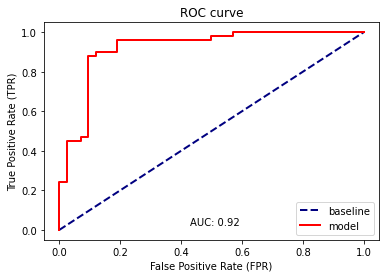

In [82]:
plot_roc(y_test, lr1.predict_proba(X_test)[:,1])

In [83]:
import matplotlib.pyplot as plt
from sklearn.metrics import (
auc, average_precision_score, precision_recall_curve
)
def plot_pr_curve(y_test, preds, positive_class=1, ax=None):
    """
    Plot precision-recall curve to evaluate classification.
    Parameters:
    - y_test: The true values for y
    - preds: The predicted values for y as probabilities
    - positive_class: The label for the positive class in the data
    - ax: The matplotlib Axes object to plot on
    Returns: Plotted precision-recall curve.
    """
    precision, recall, thresholds = precision_recall_curve(
    y_test, preds
    )
    if not ax:
        fig, ax = plt.subplots()
    ax.axhline(
    sum(y_test == positive_class)/len(y_test), color='navy',
    lw=2, linestyle='--', label='baseline'
    )
    ax.plot(recall, precision, color='red', lw=2, label='model')
    ax.legend()
    ax.set_title(
    'Precision-recall curve\n'
    f""" AP: {average_precision_score(
    y_test, preds, pos_label=positive_class
    ):.2} | """
    f'AUC: {auc(recall, precision):.2}'
    )
    ax.set_xlabel('Recall')
    ax.set_ylabel('Precision')
    ax.set_xlim(-0.05, 1.05)
    ax.set_ylim(-0.05, 1.05)
    return ax

<AxesSubplot:title={'center':'Precision-recall curve\n AP: 0.92 | AUC: 0.92'}, xlabel='Recall', ylabel='Precision'>

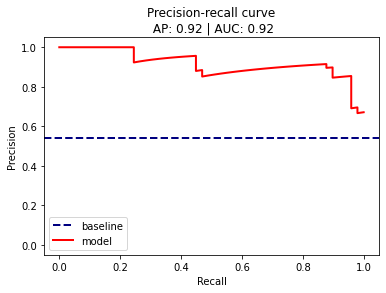

In [84]:
plot_pr_curve(y_test, lr1.predict_proba(X_test)[:,1])